## **Black Friday Dataset used**

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import probplot, shapiro, normaltest
import warnings
warnings.filterwarnings('ignore')

In [227]:
# # Setting style for better plots
# plt.style.use('default')
# sns.set_palette("husl")

In [228]:
df = pd.read_csv("/content/blackfriday_train.csv")

In [229]:
print(f"Dataset Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Dataset Shape: (550068, 12)
Columns: ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


In [230]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [232]:
print(f"\nMissing Values:")
print(df.isnull().sum())


Missing Values:
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


In [233]:
df['Product_Category_2'].fillna(0, inplace=True)
df['Product_Category_3'].fillna(0, inplace=True)

In [234]:
print(df.isnull().sum())

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64


## **OUTLIER ANALYSIS WITH BOX PLOTS**


In [236]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

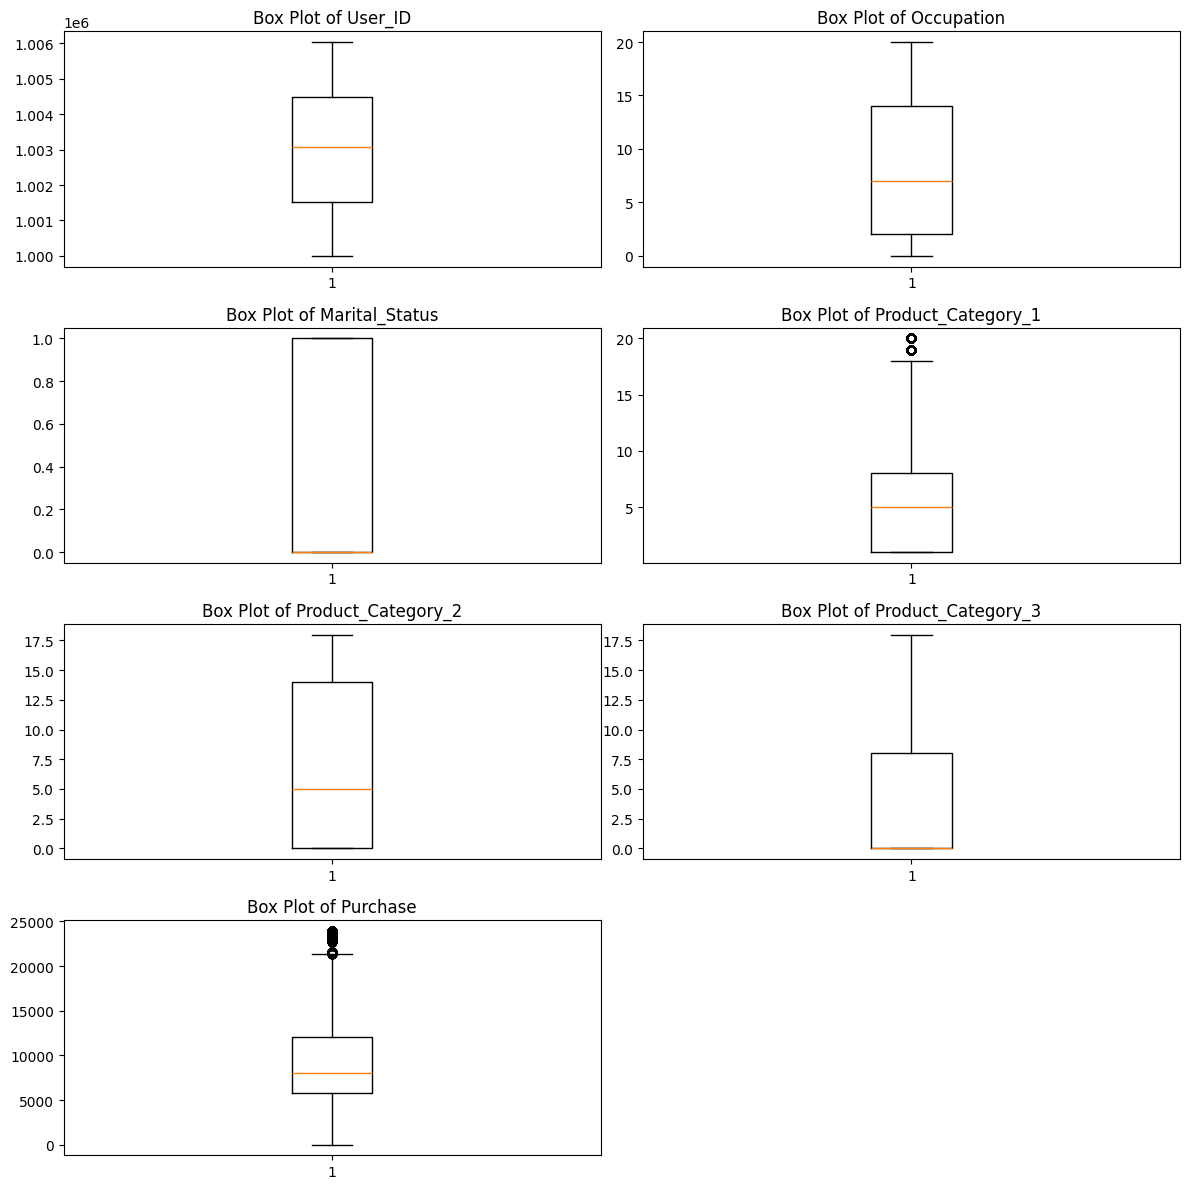

In [242]:
import math

n_cols = len(numeric_cols)               # number of numeric features
rows = math.ceil(n_cols / 2)             # 2 columns per row

plt.figure(figsize=(12, rows * 3))       # scale figure height with rows

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(rows, 2, i)              # dynamic grid
    plt.boxplot(df[column].dropna())
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


In [243]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [244]:
print(f"\nOutlier Detection Results (IQR Method):")
print("-" * 50)
for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_percentage = (len(outliers) / len(df)) * 100

    print(f"\n{col}:")
    print(f"  Lower Bound: {lower:.2f}")
    print(f"  Upper Bound: {upper:.2f}")
    print(f"  Number of Outliers: {len(outliers):,}")
    print(f"  Percentage of Outliers: {outlier_percentage:.2f}%")
    print(f"  Min Value: {df[col].min():.2f}")
    print(f"  Max Value: {df[col].max():.2f}")


Outlier Detection Results (IQR Method):
--------------------------------------------------

Product_Category_1:
  Lower Bound: -9.50
  Upper Bound: 18.50
  Number of Outliers: 4,153
  Percentage of Outliers: 0.75%
  Min Value: 1.00
  Max Value: 20.00

Product_Category_2:
  Lower Bound: -21.00
  Upper Bound: 35.00
  Number of Outliers: 0
  Percentage of Outliers: 0.00%
  Min Value: 0.00
  Max Value: 18.00

Product_Category_3:
  Lower Bound: -12.00
  Upper Bound: 20.00
  Number of Outliers: 0
  Percentage of Outliers: 0.00%
  Min Value: 0.00
  Max Value: 18.00


## **CORRELATION ANALYSIS**

In [245]:
df_encoded = df.copy()

In [246]:
from sklearn.preprocessing import LabelEncoder

In [247]:
categorical_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [248]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

Encoded Gender: {'F': np.int64(0), 'M': np.int64(1)}
Encoded Age: {'0-17': np.int64(0), '18-25': np.int64(1), '26-35': np.int64(2), '36-45': np.int64(3), '46-50': np.int64(4), '51-55': np.int64(5), '55+': np.int64(6)}
Encoded City_Category: {'A': np.int64(0), 'B': np.int64(1), 'C': np.int64(2)}
Encoded Stay_In_Current_City_Years: {'0': np.int64(0), '1': np.int64(1), '2': np.int64(2), '3': np.int64(3), '4+': np.int64(4)}


In [249]:
correlation_matrix = df_encoded.select_dtypes(include=[np.number]).corr()

In [250]:
print(f"\nCorrelation with Purchase (Target Variable):")
purchase_corr = correlation_matrix['Purchase'].sort_values(ascending=False)
print(purchase_corr)


Correlation with Purchase (Target Variable):
Purchase                      1.000000
Product_Category_3            0.288501
City_Category                 0.061914
Gender                        0.060346
Product_Category_2            0.052288
Occupation                    0.020833
Age                           0.015839
Stay_In_Current_City_Years    0.005422
User_ID                       0.004716
Marital_Status               -0.000463
Product_Category_1           -0.343703
Name: Purchase, dtype: float64


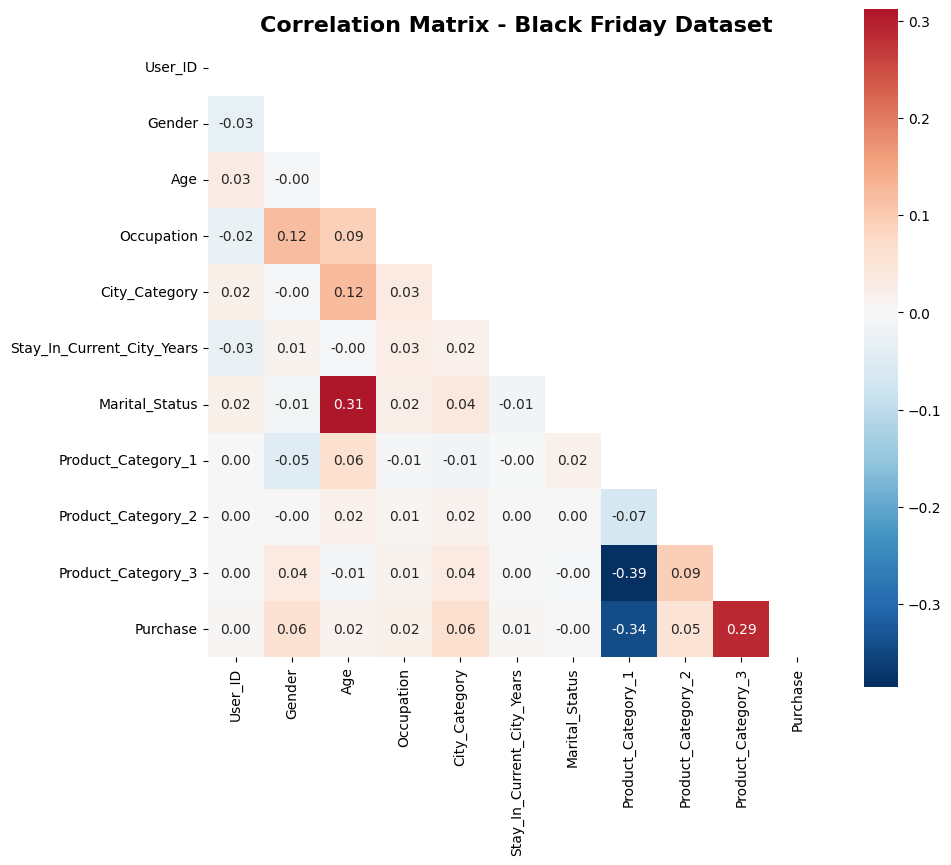

In [251]:
plt.figure(figsize=(10, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            cmap='RdBu_r',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('Correlation Matrix - Black Friday Dataset', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## **NORMALITY ANALYSIS - Q-Q PLOTS AND PROBABILITY PLOTS**


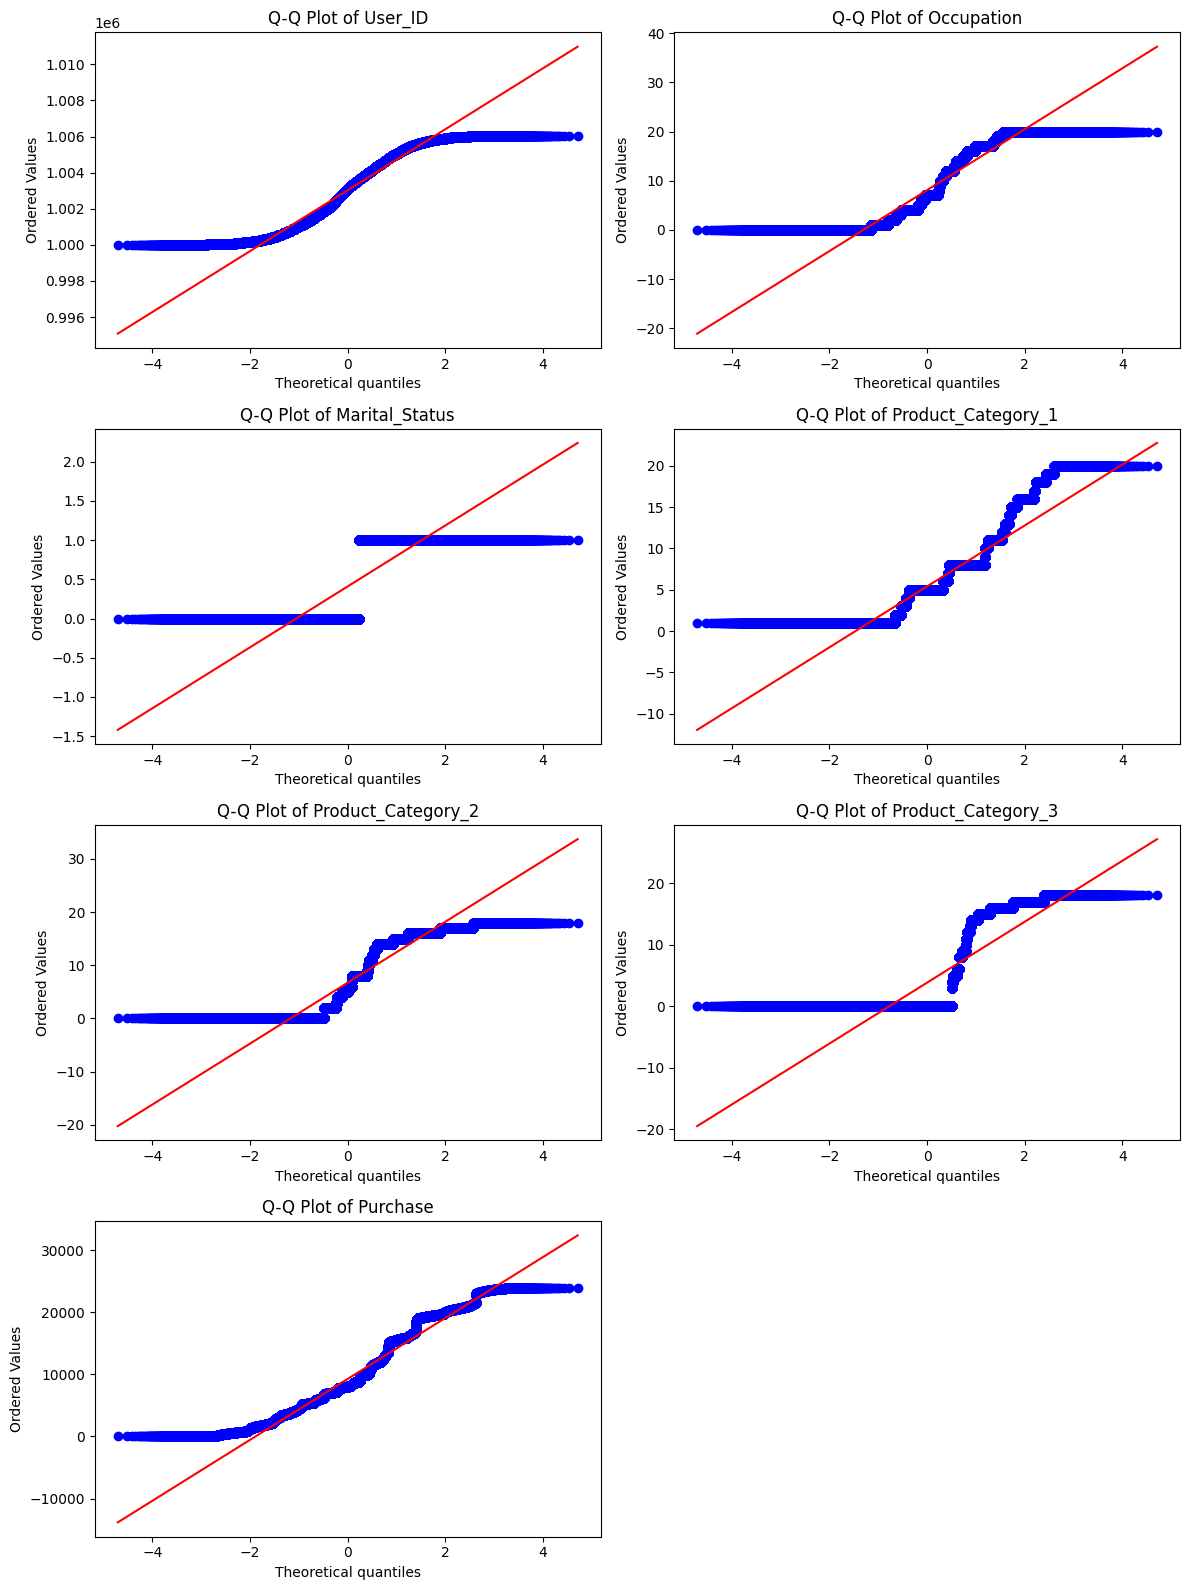

In [256]:
n_cols = len(numeric_cols)               # total numeric columns
cols = 2                                 # plots per row
rows = math.ceil(n_cols / cols)          # required rows

plt.figure(figsize=(12, rows * 4))       # scale height with number of rows

for i, column in enumerate(numeric_cols, 1):   # start from 1
    plt.subplot(rows, cols, i)
    stats.probplot(df[column].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')

plt.tight_layout()
plt.show()
